#AndraPradesh RAINFALL TREND ANALYSIS

Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### INSTALLING NECESSARY LIBRARIES

In [ ]:
!pip install geopandas

In [ ]:
!pip install tslearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 369.8/369.8 kB 4.2 MB/s eta 0:00:00


In [ ]:
!pip install fastdtw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512575 sha256=a2e1ca84b951b64ed0707740da657c81ed08eeb27eaf1c0ca56b1063e54d0e6d
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [ ]:
!pip install pymannkendall

In [ ]:
!pip install pyhomogeneity

In [ ]:
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

import pyproj
from shapely.geometry import Point

import pandas as pd

from fastdtw import fastdtw

from scipy.stats import kendalltau, norm, linregress

import pyhomogeneity as hg
from scipy.stats import zscore

In [ ]:
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### IMPLEMENTATION

IMPORTING INDIAN METEROLOGICAL DEPARTMENT (IMD) RAINFALL DATASETS 2022 TO 1901

In [ ]:
data_path = '/content/drive/My Drive/Rainfall-dataset-2022to1901/'


In [ ]:
rainfall_data_2001 = xr.open_dataset(data_path + '2001.nc')
print(rainfall_data_2001.head())

<xarray.Dataset>
Dimensions:    (LONGITUDE: 5, LATITUDE: 5, TIME: 5)
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 66.5 67.5 68.5 69.5 70.5
  * LATITUDE   (LATITUDE) float64 6.5 7.5 8.5 9.5 10.5
  * TIME       (TIME) datetime64[ns] 2001-01-01 2001-01-02 ... 2001-01-05
Data variables:
    RAINFALL   (TIME, LATITUDE, LONGITUDE) float64 ...
Attributes:
    history:      FERRET V7.5 (optimized) 28-Mar-22
    Conventions:  CF-1.6


PRINTING THE LATITUDNAL AND LONGITUDNAL RANGE OF THE RAINFALL DATASETS

In [ ]:
# Access the longitude and latitude coordinates from the dataset
longitude_values = rainfall_data_2001['LONGITUDE'].values
latitude_values = rainfall_data_2001['LATITUDE'].values

# Find the minimum and maximum values for longitude and latitude
min_longitude = longitude_values.min()
max_longitude = longitude_values.max()
min_latitude = latitude_values.min()
max_latitude = latitude_values.max()

# Print the range of longitude and latitude
print(f"Longitude Range: ({min_longitude}, {max_longitude})")
print(f"Latitude Range: ({min_latitude}, {max_latitude})")

Longitude Range: (66.5, 100.5)
Latitude Range: (6.5, 38.5)


In [ ]:
print(f"Latitude values: {latitude_values}", "\n")

print(f"Longitude values: {longitude_values}")

Latitude values: [ 6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5 14.5 15.5 16.5 17.5 18.5 19.5
 20.5 21.5 22.5 23.5 24.5 25.5 26.5 27.5 28.5 29.5 30.5 31.5 32.5 33.5
 34.5 35.5 36.5 37.5 38.5] 

Longitude values: [ 66.5  67.5  68.5  69.5  70.5  71.5  72.5  73.5  74.5  75.5  76.5  77.5
  78.5  79.5  80.5  81.5  82.5  83.5  84.5  85.5  86.5  87.5  88.5  89.5
  90.5  91.5  92.5  93.5  94.5  95.5  96.5  97.5  98.5  99.5 100.5]


IMPORTING THE SHAPEFILE OF INDIA

In [ ]:
India_shapefile_path = '/content/drive/My Drive/AmmuProject/IndiaDisShapefile/output.shp'
India_shapefile = gpd.read_file(India_shapefile_path)
print(India_shapefile)

     objectid statecode    statename state_ut distcode      distname  \
0           1        05  Uttarakhand    STATE      066      Nainital   
1           2        05  Uttarakhand    STATE      060      Dehradun   
2           3        05  Uttarakhand    STATE      064        Almora   
3           4        05  Uttarakhand    STATE      065     Champawat   
4           5        05  Uttarakhand    STATE      056    Uttarkashi   
..        ...       ...          ...      ...      ...           ...   
688       691        36    Telangana    STATE      T28    Wanaparthy   
689       692        36    Telangana    STATE      T27     Vikarabad   
690       693        36    Telangana    STATE      T13  Mahabubnagar   
691        41        01       Ladakh    STATE      004        Kargil   
692        34        01       Ladakh    STATE      003  Leh (Ladakh)   

     distarea  totalpopul   totalhh  totpopmale  totpopfema    st_areasha  \
0      4251.0    954605.0  191383.0    493666.0    460939.

In [ ]:
print(India_shapefile['statename'].unique())

['Uttarakhand' 'Himachal Pradesh' 'Madhya Pradesh' 'Jammu & Kashmir'
 'Gujarat' 'Andhra Pradesh' 'West Bengal' 'Uttar Pradesh' 'Daman & Diu'
 'Kerala' 'Lakshadweep' 'Sikkim' 'Bihar' 'Dadra & Nagar Haveli'
 'Jharkhand' 'NCT of Delhi' 'Haryana' 'Punjab' 'Karnataka' 'Maharashtra'
 'Chandigarh' 'Pondicherry' 'Manipur' 'Mizoram' 'Tamil Nadu' 'Nagaland'
 'Arunachal Pradesh' 'Assam' 'Tripura' 'Meghalaya' 'Telangana' 'Goa'
 'Andaman & Nicobar Islands' 'Orissa' 'Rajasthan' 'Chhatisgarh' 'Ladakh']






FILTERING AndraPradesh'S GEODATAFRAME FROM THE SHAPEFILE OF INDIA

In [ ]:
# Filter the GeoDataFrame to get the Sikkim polygon
AndraPradesh_shapefile = India_shapefile[India_shapefile['statename'] == 'Andhra Pradesh']
print(AndraPradesh_shapefile)

     objectid statecode       statename state_ut distcode  \
75        134        28  Andhra Pradesh    STATE      549   
76        135        28  Andhra Pradesh    STATE      547   
90        143        28  Andhra Pradesh    STATE      552   
91        144        28  Andhra Pradesh    STATE      548   
92        145        28  Andhra Pradesh    STATE      543   
93        146        28  Andhra Pradesh    STATE      553   
94        147        28  Andhra Pradesh    STATE      546   
95        148        28  Andhra Pradesh    STATE      551   
165       138        28  Andhra Pradesh    STATE      545   
166       139        28  Andhra Pradesh    STATE      544   
167       140        28  Andhra Pradesh    STATE      550   
168       141        28  Andhra Pradesh    STATE      554   
169       142        28  Andhra Pradesh    STATE      542   

                        distname  distarea  totalpopul    totalhh  totpopmale  \
75                      Prakasam   17626.0   3397448.0   860463.

PRINTING THE LATITUDNAL AND LONGITUDNAL RANGE OF AndraPradesh

In [ ]:
# Extract the geometry of the AndraPradesh polygon
AndraPradesh_geometry = AndraPradesh_shapefile['geometry'].iloc[0]

# Get the bounding box (envelope) of the AndraPradesh polygon
AndraPradesh_bbox = AndraPradesh_geometry.bounds

# Extract latitude and longitude range
min_longitude, min_latitude, max_longitude, max_latitude = AndraPradesh_bbox

print(f"Latitude Range: {min_latitude} to {max_latitude}")
print(f"Longitude Range: {min_longitude} to {max_longitude}")


Latitude Range: 14.954840000218391 to 16.31897999986381
Longitude Range: 78.7434700000412 to 80.48183999994863


In [ ]:
#min_longitude, min_latitude, max_longitude, max_latitude = 91.20,26.28,97.30,29.30

print(f"Latitude Range: {min_latitude} to {max_latitude}")
print(f"Longitude Range: {min_longitude} to {max_longitude}")

Latitude Range: 14.954840000218391 to 16.31897999986381
Longitude Range: 78.7434700000412 to 80.48183999994863


AVERAGE DAILY RAINFALL OF AndraPradesh FROM 2022 TO 1901

In [ ]:
import pyproj
from shapely.geometry import Point

for year in range(2022, 1900, -1):
  rainfall_data = xr.open_dataset(data_path + f'{year}.nc')
  # Find latitude and longitude indices within the AndraPradesh's boundaries
  latitude_indices = np.where((rainfall_data['LATITUDE'] >= min_latitude) & (rainfall_data['LATITUDE'] <= max_latitude))[0]
  longitude_indices = np.where((rainfall_data['LONGITUDE'] >= min_longitude) & (rainfall_data['LONGITUDE'] <= max_longitude))[0]

  # Slice the rainfall data for AndraPradesh
  AndraPradesh_rainfall_data = rainfall_data['RAINFALL'][:, latitude_indices, longitude_indices]
  #Calculate the average and sum rainfall for each day over the entire time range
  average_rainfall_per_day = np.mean(AndraPradesh_rainfall_data, axis=(1, 2))
  sum_rainfall_per_day = np.sum(AndraPradesh_rainfall_data, axis=(1, 2))
  # Plot the average rainfall for each day using a line plot
  plt.figure(figsize=(12, 6))
  plt.plot(np.arange(1, len(average_rainfall_per_day) + 1),average_rainfall_per_day , marker='o', linestyle='-', color='b')
  plt.xlabel('Day of the Year')
  plt.ylabel('Average Rainfall (mm)')
  plt.title(f'Average Daily Rainfall in AndraPradesh for {year}')
  plt.grid(True)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Load the NetCDF file
file_pattern = '{year}.nc'

# Load all NetCDF files
years = np.arange(1901, 2023)
ds_list = [xr.open_dataset(data_path + file_pattern.format(year=year)) for year in years]
# latitude and longitude ranges for AndraPradesh


# Filter the NetCDF files to include only those within the defined latitude and longitude ranges
ds_list = [ds for ds in ds_list if (ds['LATITUDE'].min() >= min_latitude and ds['LATITUDE'].max() <= max_latitude) and (ds['LONGITUDE'].min() >= min_longitude and ds['LONGITUDE'].max() <= max_longitude)]


# Calculate annual average rainfall for each year
for year in years:
    ds = xr.open_dataset(data_path + file_pattern.format(year=year))
    annual_avg_rainfall = ds['RAINFALL'].mean(dim=['LATITUDE', 'LONGITUDE'])

    # Plot the average rainfall for the current year
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(1, len(annual_avg_rainfall.data) + 1), annual_avg_rainfall.data, marker='o', linestyle='-')
    plt.xlabel('Days')
    plt.ylabel('Average Rainfall (mm)')
    plt.title(f'Average Rainfall in {year}')
    plt.grid(True)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

SUM DAILY RAINFALL OF AndraPradesh FROM 2022 TO 1901

In [ ]:
import pyproj
from shapely.geometry import Point

for year in range(2022, 1900, -1):
  rainfall_data = xr.open_dataset(data_path + f'{year}.nc')
  # Find latitude and longitude indices within the AndraPradesh's boundaries
  latitude_indices = np.where((rainfall_data['LATITUDE'] >= min_latitude) & (rainfall_data['LATITUDE'] <= max_latitude))[0]
  longitude_indices = np.where((rainfall_data['LONGITUDE'] >= min_longitude) & (rainfall_data['LONGITUDE'] <= max_longitude))[0]

  # Slice the rainfall data for AndraPradesh
  AndraPradesh_rainfall_data = rainfall_data['RAINFALL'][:, latitude_indices, longitude_indices]
  #Calculate the average and sum rainfall for each day over the entire time range
  average_rainfall_per_day = np.mean(AndraPradesh_rainfall_data, axis=(1, 2))
  sum_rainfall_per_day = np.sum(AndraPradesh_rainfall_data, axis=(1, 2))
  # Plot the sum rainfall for each day using a line plot
  plt.figure(figsize=(12, 6))
  plt.plot(np.arange(1, len(sum_rainfall_per_day) + 1),sum_rainfall_per_day , marker='o', linestyle='-', color='b')
  plt.xlabel('Day of the Year')
  plt.ylabel('Sum Rainfall (mm)')
  plt.title(f'Sum Daily Rainfall in AndraPradesh for {year}')
  plt.grid(True)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

 MONTHLY RAINFALL OF AndraPradesh FROM 2022 TO 1901 (Using average daily rainfall)

In [ ]:
for year in range(2022, 1900, -1):
    # Load the rainfall data for the current year
    rainfall_data = xr.open_dataset(data_path + f'{year}.nc')

    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    # Find latitude and longitude indices within the AndraPradesh's boundaries
    latitude_indices = np.where((rainfall_data['LATITUDE'] >= min_latitude) & (rainfall_data['LATITUDE'] <= max_latitude))[0]
    longitude_indices = np.where((rainfall_data['LONGITUDE'] >= min_longitude) & (rainfall_data['LONGITUDE'] <= max_longitude))[0]

    # Slice the rainfall data for AndraPradesh
    AndraPradesh_rainfall_data = rainfall_data['RAINFALL'][:, latitude_indices, longitude_indices]
    average_rainfall_per_day = np.mean(AndraPradesh_rainfall_data, axis=(1, 2))
    # Resample the data to monthly rainfall
    AndraPradesh_monthly_rainfall = average_rainfall_per_day.resample(TIME='1M').sum()

    y_data = AndraPradesh_monthly_rainfall.values.squeeze()

    # Plot the monthly rainfall using a line plot
    plt.figure(figsize=(12, 6))
    plt.plot(months, y_data, marker='o', linestyle='-', color='b')
    plt.xlabel('Month')
    plt.ylabel('Rainfall (mm)')
    plt.title(f'Monthly Rainfall in AndraPradesh for {year}')
    plt.grid(True)
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

AVERAGE MONTHLY RAINFALL OF AndraPradesh FROM 2022 TO 1901 (Using average daily rainfall)

In [ ]:
for year in range(2022, 1900, -1):
    # Load the rainfall data for the current year
    rainfall_data = xr.open_dataset(data_path + f'{year}.nc')

    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    # Find latitude and longitude indices within the AndraPradesh's boundaries
    latitude_indices = np.where((rainfall_data['LATITUDE'] >= min_latitude) & (rainfall_data['LATITUDE'] <= max_latitude))[0]
    longitude_indices = np.where((rainfall_data['LONGITUDE'] >= min_longitude) & (rainfall_data['LONGITUDE'] <= max_longitude))[0]

    # Slice the rainfall data for AndraPradesh
    AndraPradesh_rainfall_data = rainfall_data['RAINFALL'][:, latitude_indices, longitude_indices]
    average_rainfall_per_day = np.mean(AndraPradesh_rainfall_data, axis=(1, 2))
    # Resample the data to monthly averages
    AndraPradesh_monthly_average_rainfall = average_rainfall_per_day.resample(TIME='1M').mean()

    y_data = AndraPradesh_monthly_average_rainfall.values.squeeze()

    # Plot the average monthly rainfall using a line plot
    plt.figure(figsize=(12, 6))
    plt.plot(months, y_data, marker='o', linestyle='-', color='b')
    plt.xlabel('Month')
    plt.ylabel('Average Rainfall (mm)')
    plt.title(f'Average Monthly Rainfall in AndraPradesh for {year}')
    plt.grid(True)
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

 DYNAMIC TIME WARPING (DTW) FOR ANALYSING THE SIMILARITY OF MONTHLY AVERAGE RAINFALL FROM 2022 TO 1901.
 ##### Lowest peaks : Highest similarity (vice versa)

In [ ]:
for year1 in range(2022,1900,-1):
  dfs = []
  # Load the rainfall data for the current years
  rainfall_data1 = xr.open_dataset(data_path + f'{year1}.nc')

  # Find latitude and longitude indices within the AndraPradesh's boundaries
  latitude_indices1 = np.where((rainfall_data1['LATITUDE'] >= min_latitude) & (rainfall_data1['LATITUDE'] <= max_latitude))[0]
  longitude_indices1 = np.where((rainfall_data1['LONGITUDE'] >= min_longitude) & (rainfall_data1['LONGITUDE'] <= max_longitude))[0]

  # Slice the rainfall data for AndraPradesh
  AndraPradesh_rainfall_data1 = rainfall_data1['RAINFALL'][:, latitude_indices1, longitude_indices1]
  average_rainfall_per_day1 = np.mean(AndraPradesh_rainfall_data1, axis=(1, 2))
  # Resample the data to monthly averages
  AndraPradesh_monthly_average_rainfall1 = average_rainfall_per_day1.resample(TIME='1M').mean()

  for year2 in range(year1-1,1900,-1):

    # Load the rainfall data for the current years
    rainfall_data2 = xr.open_dataset(data_path + f'{year2}.nc')

    # Find latitude and longitude indices within the AndraPradesh's boundaries
    latitude_indices2 = np.where((rainfall_data2['LATITUDE'] >= min_latitude) & (rainfall_data2['LATITUDE'] <= max_latitude))[0]
    longitude_indices2 = np.where((rainfall_data2['LONGITUDE'] >= min_longitude) & (rainfall_data2['LONGITUDE'] <= max_longitude))[0]

    # Slice the rainfall data for AndraPradesh
    AndraPradesh_rainfall_data2 = rainfall_data2['RAINFALL'][:, latitude_indices2, longitude_indices2]
    average_rainfall_per_day2 = np.mean(AndraPradesh_rainfall_data2, axis=(1, 2))
    # Resample the data to monthly averages
    AndraPradesh_monthly_average_rainfall2 = average_rainfall_per_day2.resample(TIME='1M').mean()

    dtw_distance, _ = fastdtw(AndraPradesh_monthly_average_rainfall1, AndraPradesh_monthly_average_rainfall2)

    # Store the DTW distance and the corresponding year
    dfs.append({'Year': year2, 'DTW Distance': dtw_distance})

    # Create a DataFrame from the list of dictionaries
    result_df = pd.DataFrame(dfs)

  # Plot the DTW distances
  plt.figure(figsize=(40, 6))
  plt.plot(result_df['Year'], result_df['DTW Distance'], marker='o', linestyle='-', color='b')
  plt.xlabel('Years')
  plt.ylabel('DTW Distance')
  plt.title(f'Similarity of AndraPradesh\'s Average Monthly Rainfall of {year1} ')
  plt.xticks(np.arange(min(result_df['Year']), max(result_df['Year']) + 1, 1), rotation=45, ha='right')
  plt.grid(True)
  plt.show()


Output hidden; open in https://colab.research.google.com to view.

MONTHLY RAINFALL & TOTAL ANNUAL RAINFALL FROM 1901 TO 2022

In [ ]:
dfs = []

for year in range(1901, 2023):
    # Load the rainfall data for the current year
    rainfall_data = xr.open_dataset(data_path + f'{year}.nc')

    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    # Find latitude and longitude indices within the state's boundaries
    latitude_indices = np.where((rainfall_data['LATITUDE'] >= min_latitude) & (rainfall_data['LATITUDE'] <= max_latitude))[0]
    longitude_indices = np.where((rainfall_data['LONGITUDE'] >= min_longitude) & (rainfall_data['LONGITUDE'] <= max_longitude))[0]

    # Slice the rainfall data for the state
    AndraPradesh_rainfall_data = rainfall_data['RAINFALL'][:, latitude_indices, longitude_indices]

    # Resample the data to monthly averages
    #sikkim_monthly_sum_rainfall = sikkim_rainfall_data.resample(TIME='1M').sum()
    average_rainfall_per_day = np.mean(AndraPradesh_rainfall_data, axis=(1, 2))
    AndraPradesh_monthly_rainfall = average_rainfall_per_day.resample(TIME='1M').sum()
    df_year = pd.DataFrame({
        'Year': [year] * len(AndraPradesh_monthly_rainfall['TIME']),
        'Month': AndraPradesh_monthly_rainfall['TIME'].dt.strftime('%b'),
        'Monthly Rainfall': AndraPradesh_monthly_rainfall.values.flatten()
    })

    # Append the DataFrame to the list
    dfs.append(df_year)

# Concatenate all DataFrames into a single DataFrame
result_df = pd.concat(dfs, ignore_index=True)

# Pivot the DataFrame to have months as columns
result_df_pivoted = result_df.pivot_table(index='Year', columns='Month', values='Monthly Rainfall', aggfunc='sum', fill_value=0)

# Add a column for Total Annual Rainfall
result_df_pivoted['Total Annual Rainfall'] = result_df_pivoted.sum(axis=1)

# Reset index to make 'Year' a column again
result_df_pivoted = result_df_pivoted.reset_index()

# Display the resulting DataFrame
print(result_df_pivoted)

Month  Year        Apr         Aug         Dec        Feb        Jan  \
0      1901   0.184136   66.533338   22.477845  49.106712  35.368074   
1      1902  22.978106  136.642141   54.507965   0.000000   0.000000   
2      1903   0.480890  109.855087   14.659385   0.000000  17.923979   
3      1904   1.545140   29.845891    9.422664   0.000000  61.769017   
4      1905   0.700517   83.663566    0.000000   1.341942   3.111366   
..      ...        ...         ...         ...        ...        ...   
117    2018   2.282420   73.362413   11.770970   0.000000   0.000000   
118    2019  46.844463   89.556454   42.668170   3.097314  23.612766   
119    2020  77.881849  140.067928    3.279628  17.028197  13.118056   
120    2021   8.320922   79.015250   11.426982   4.163130   3.112347   
121    2022   0.000000   84.839361  151.373856   0.000000  22.951172   

Month         Jul         Jun        Mar         May         Nov         Oct  \
0       69.375447   23.272290   0.000000   46.685632  1

In [ ]:
print(np.mean(result_df_pivoted['Total Annual Rainfall'] ))

761.8745326143307


MEAN, STANDARD DEVIATION, RANGE OF TOTAL ANNUAL RAINFALL, POINT OF HIGHEST AND LOWEST RAINFALL

In [ ]:
mean = np.mean(result_df_pivoted['Total Annual Rainfall'] )
std = np.std(result_df_pivoted['Total Annual Rainfall'] )
print(f"Mean of Total Annual Rainfall: {mean} mm")
print(f"Standard deviation of Total Annual Rainfall: {std} mm")
print(f"Range of Total Annual Rainfall: {mean - std}mm <= Rainfall <= {mean + std}mm")
print('\n')
max_rainfall_year = result_df_pivoted.loc[result_df_pivoted['Total Annual Rainfall'].idxmax(), 'Year']
max_rainfall_value = result_df_pivoted['Total Annual Rainfall'].max()

print(f"Year with the Highest Rainfall: {max_rainfall_year}")
print(f"Highest Rainfall Value: {max_rainfall_value} mm")
print('\n')
min_rainfall_year = result_df_pivoted.loc[result_df_pivoted['Total Annual Rainfall'].idxmin(), 'Year']
min_rainfall_value = result_df_pivoted['Total Annual Rainfall'].min()

print(f"Year with the Lowest Rainfall: {min_rainfall_year}")
print(f"Lowest Rainfall Value: {min_rainfall_value} mm")

Mean of Total Annual Rainfall: 761.8745326143307 mm
Standard deviation of Total Annual Rainfall: 233.28858110604682 mm
Range of Total Annual Rainfall: 528.5859515082839mm <= Rainfall <= 995.1631137203776mm


Year with the Highest Rainfall: 2010
Highest Rainfall Value: 1726.7360148206353 mm


Year with the Lowest Rainfall: 1904
Lowest Rainfall Value: 367.96714673936367 mm


YEARS WITH ANNUAL RAINFALL ABOVE 95 PERCENTILE AND BELOW 5 PERCENTILE FOR YEARS FROM 2010 TO 2022

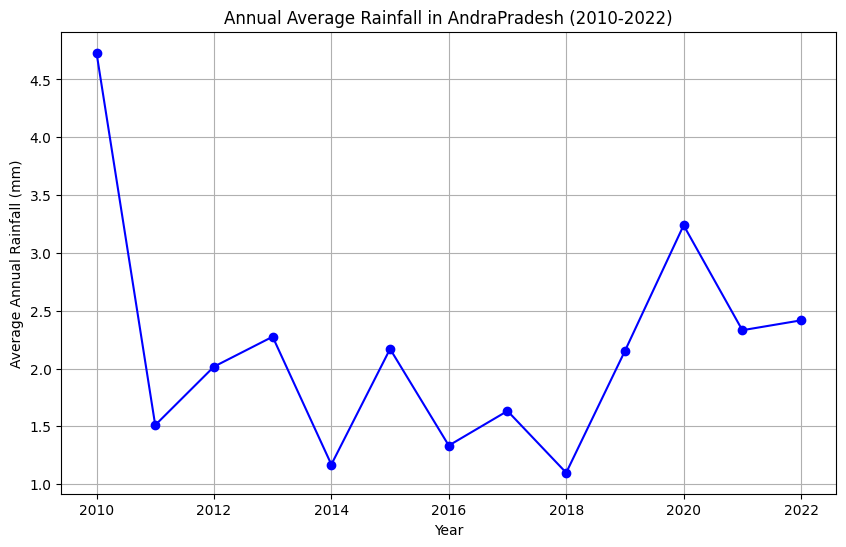

Years above 95th percentile: [2010]
Years below 5th percentile: [2018]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr



# Initialize an empty list to store annual average rainfall
annual_averages = []

# Loop through each year in the specified range (2010 to 2022)
for year in range(2010, 2023):
    # Load the rainfall data for the current year
    rainfall_data = xr.open_dataset(data_path + f'{year}.nc')

    # Find latitude and longitude indices within AndraPradesh's boundaries
    latitude_indices = np.where((rainfall_data['LATITUDE'] >= min_latitude) & (rainfall_data['LATITUDE'] <= max_latitude))[0]
    longitude_indices = np.where((rainfall_data['LONGITUDE'] >= min_longitude) & (rainfall_data['LONGITUDE'] <= max_longitude))[0]

    # Slice the rainfall data for AndraPradesh
    AndraPradesh_rainfall_data = rainfall_data['RAINFALL'][:, latitude_indices, longitude_indices]

    # Calculate the annual average rainfall
    annual_average_rainfall = AndraPradesh_rainfall_data.mean(dim='TIME').sum().item()
    annual_averages.append(annual_average_rainfall)

    # Close the NetCDF dataset to free up resources
    rainfall_data.close()

# Plot the annual average rainfall
plt.figure(figsize=(10, 6))
plt.plot(range(2010, 2023), annual_averages, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Average Annual Rainfall (mm)')
plt.title('Annual Average Rainfall in AndraPradesh (2010-2022)')
plt.grid(True)
plt.show()

# Calculate percentiles
percentile_5 = np.percentile(annual_averages, 5)
percentile_95 = np.percentile(annual_averages, 95)

# Print years above 95th percentile
above_95 = [year for year, avg in zip(range(2010, 2023), annual_averages) if avg > percentile_95]
print(f'Years above 95th percentile: {above_95}')

# Print years below 5th percentile
below_5 = [year for year, avg in zip(range(2010, 2023), annual_averages) if avg < percentile_5]
print(f'Years below 5th percentile: {below_5}')

MONTHLY RAINFALL ANALYSIS FROM 1901 TO 2022

In [ ]:
for month in months:
  # Calculate the Z-scores for the 'month' column
  z_scores = zscore(result_df_pivoted[month])

  # Define a threshold for identifying outliers (e.g., Z-score greater than 2)
  outlier_threshold = 2

  # Identify outlier indices
  outlier_indices = np.where(np.abs(z_scores) > outlier_threshold)[0]

  # Plot the line graph with outliers highlighted
  plt.figure(figsize=(40, 6))
  plt.plot(result_df_pivoted['Year'], result_df_pivoted[month], marker='o', linestyle='-', color='b')
  plt.scatter(result_df_pivoted['Year'].iloc[outlier_indices], result_df_pivoted[month].iloc[outlier_indices], color='r', label='Outliers',  zorder=5)
  plt.xlabel('Years')
  plt.ylabel('Monthly Rainfall (mm)')
  plt.title(f'Monthly Rainfall in Andra Pradesh on {month} with Outliers')
  plt.xticks(np.arange(min(result_df_pivoted['Year']), max(result_df_pivoted['Year']) + 1, 1), rotation=45, ha='right')
  plt.legend()
  plt.grid(True)
  plt.show()

  # Print information about outliers
  print(f"Number of Outliers: {len(outlier_indices)}")
  print(f"Outlier Years: {result_df_pivoted['Year'].iloc[outlier_indices].tolist()}")
  print(f"Outlier Values: {result_df_pivoted[month].iloc[outlier_indices].tolist()}")

Output hidden; open in https://colab.research.google.com to view.

TOTAL ANNUAL RAINFALL ANALYSIS FROM 1901 TO 2022

In [ ]:
from scipy.stats import zscore

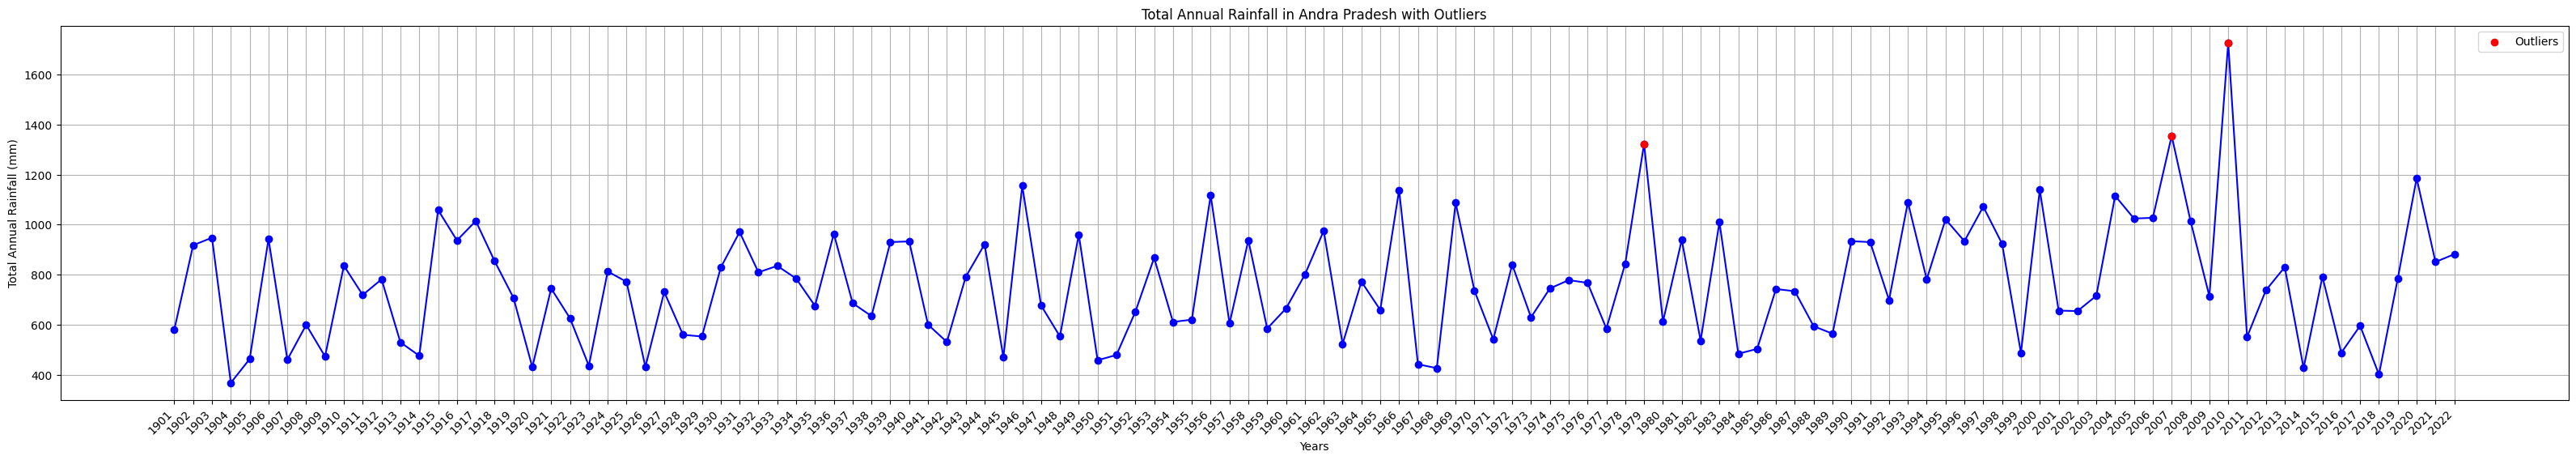

Number of Outliers: 3
Outlier Years: [1979, 2007, 2010]
Outlier Values: [1322.6199997216463, 1354.864813387394, 1726.7360148206353]


In [ ]:
# Calculate the Z-scores for the 'Total Annual Rainfall' column
z_scores = zscore(result_df_pivoted['Total Annual Rainfall'])

# Define a threshold for identifying outliers (e.g., Z-score greater than 2)
outlier_threshold = 2

# Identify outlier indices
outlier_indices = np.where(np.abs(z_scores) > outlier_threshold)[0]

# Plot the line graph with outliers highlighted
plt.figure(figsize=(40, 6))
plt.plot(result_df_pivoted['Year'], result_df_pivoted['Total Annual Rainfall'], marker='o', linestyle='-', color='b')
plt.scatter(result_df_pivoted['Year'].iloc[outlier_indices], result_df_pivoted['Total Annual Rainfall'].iloc[outlier_indices], color='r', label='Outliers',  zorder=5)
plt.xlabel('Years')
plt.ylabel('Total Annual Rainfall (mm)')
plt.title('Total Annual Rainfall in Andra Pradesh with Outliers')
plt.xticks(np.arange(min(result_df_pivoted['Year']), max(result_df_pivoted['Year']) + 1, 1), rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.show()

# Print information about outliers
print(f"Number of Outliers: {len(outlier_indices)}")
print(f"Outlier Years: {result_df_pivoted['Year'].iloc[outlier_indices].tolist()}")
print(f"Outlier Values: {result_df_pivoted['Total Annual Rainfall'].iloc[outlier_indices].tolist()}")

10 year Interval Rainfall average

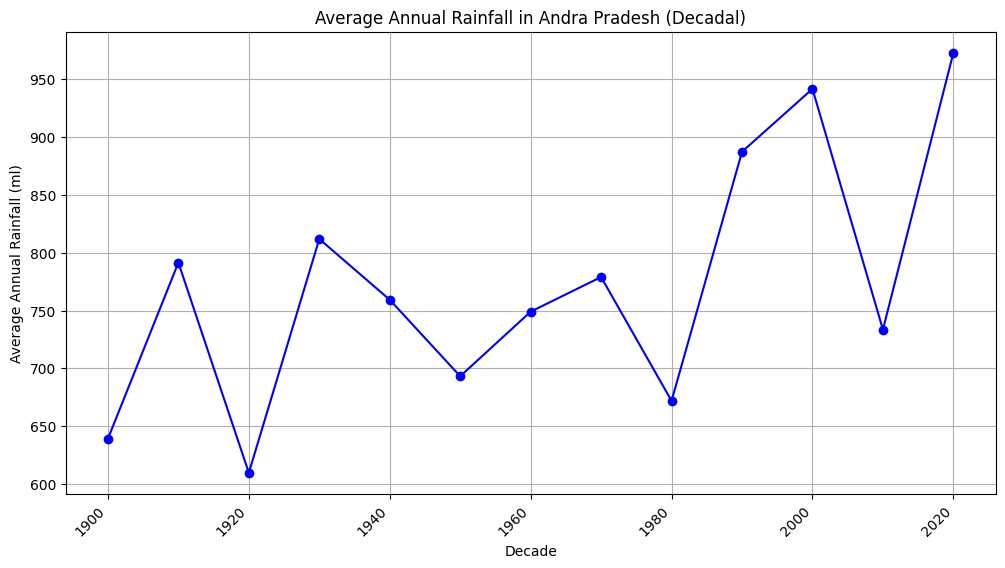

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr


# Calculate average annual rainfall across each 10 years
result_df_pivoted['Decade'] = (result_df_pivoted['Year'] // 10) * 10
decadal_average_rainfall = result_df_pivoted.groupby('Decade')['Total Annual Rainfall'].mean()

# Plot the decadal average annual rainfall as a line plot
plt.figure(figsize=(12, 6))
plt.plot(decadal_average_rainfall.index, decadal_average_rainfall, marker='o', color='b', linestyle='-')
plt.xlabel('Decade')
plt.ylabel('Average Annual Rainfall (ml)')
plt.title(f'Average Annual Rainfall in Andra Pradesh (Decadal)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

MONTHLY RAINFALL ANALYSIS FROM 1901 TO 2022

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr


# Calculate average annual rainfall across each 10 years
result_df_pivoted['Decade'] = (result_df_pivoted['Year'] // 10) * 10
decadal_average_rainfall = result_df_pivoted.groupby('Decade')['Total Annual Rainfall'].mean()

# Print the mean and standard deviation
mean_rainfall = decadal_average_rainfall.mean()
std_rainfall = decadal_average_rainfall.std()

print(f"Mean Annual Rainfall: {mean_rainfall} mm")
print(f"Standard Deviation of Annual Rainfall: {std_rainfall} mm")

Mean Annual Rainfall: 772.2824429759359 mm
Standard Deviation of Annual Rainfall: 110.53633096737042 mm


MANN-KENDALL TEST AND SEN SLOPE ESTIMATOR FOR TREND ANALYSIS.
##### Mann-Kendall test : A non-parametric statistical test used to assess the presence of trends in time series data by evaluating the monotonicity of the data over time.

##### Sen Slope Estimator : A method for estimating the slope of a trend in time series data

In [ ]:
# Filter the DataFrame for the desired years (2022 to 2012)
print("Enter the range of years(year1 to year2)")
year1 = int(input())
year2 = int(input())
selected_years = range(year1, year2 + 1)
df_selected_years = result_df_pivoted[result_df_pivoted['Year'].isin(selected_years)]

result, _ = kendalltau(df_selected_years['Year'],df_selected_years['Total Annual Rainfall'])

# Calculate p-value for the Mann-Kendall test
p_value = 2 * norm.cdf(-abs(result))

result_s = linregress(df_selected_years['Year'], df_selected_years['Total Annual Rainfall'])

# Display Mann-Kendall test result
print(f"Mann-Kendall Test Result for Yearly Sum of Rainfall ({year1} to {year2}):")
#print(f"Kendall's Tau: {result}")
print(f"P-value: {p_value}")

# Display Theil-Sen estimator result
print(f"Theil-Sen Estimator Result for Yearly Sum of Rainfall ({year1} to {year2}):")
print(f"Slope (Sen's Slope): {result_s.slope}")

if p_value < 0.05:
    if result_s.slope > 0:
        print("Significant positive trend")
    elif result_s.scope < 0:
        print("Significant negative trend")
    else:
        print("No significant trend")
else:
    print("No significant trend")

Enter the range of years(year1 to year2)
2020
2022
Mann-Kendall Test Result for Yearly Sum of Rainfall (2020 to 2022):
P-value: 0.7388826803635272
Theil-Sen Estimator Result for Yearly Sum of Rainfall (2020 to 2022):
Slope (Sen's Slope): -151.61126321181655
No significant trend


In [ ]:
# Filter the DataFrame for the desired years (2022 to 2012)
print("Enter the range of years(year1 to year2)")
year1 = int(input())
year2 = int(input())
selected_years = range(year1, year2 + 1)
df_selected_years = result_df_pivoted[result_df_pivoted['Year'].isin(selected_years)]

result, _ = kendalltau(df_selected_years['Year'],df_selected_years['Jan'])

# Calculate p-value for the Mann-Kendall test
p_value = 2 * norm.cdf(-abs(result))

result_s = linregress(df_selected_years['Year'], df_selected_years['Jan'])

# Display Mann-Kendall test result
print(f"Mann-Kendall Test Result for Monthly Rainfall of January ({year1} to {year2}):")
#print(f"Kendall's Tau: {result}")
print(f"P-value: {p_value}")

# Display Theil-Sen estimator result
print(f"Theil-Sen Estimator Result for Monthly Rainfall of January ({year1} to {year2}):")
print(f"Slope (Sen's Slope): {result_s.slope}")

if p_value < 0.05:
    if result_s.slope > 0:
        print("Significant positive trend")
    elif result_s.scope < 0:
        print("Significant negative trend")
    else:
        print("No significant trend")
else:
    print("No significant trend")

Enter the range of years(year1 to year2)
2017
2022
Mann-Kendall Test Result for Monthly Rainfall of January (2017 to 2022):
P-value: 0.7388826803635273
Theil-Sen Estimator Result for Monthly Rainfall of January (2017 to 2022):
Slope (Sen's Slope): 3.203752306529454
No significant trend


PETTITT TEST
##### A non-parametric statistical test used to detect a change point or discontinuity in a time series, indicating a significant shift in the distribution of the data.

In [ ]:
# Filter the DataFrame for the desired years (2022 to 2012)
print("Enter the range of years (year1 to year2)")
year1 = int(input())
year2 = int(input())
selected_years = range(year1, year2 + 1)
df_selected_years = result_df_pivoted[result_df_pivoted['Year'].isin(selected_years)]

# Perform Pettitt test for the selected years
result_pettitt = hg.pettitt_test(df_selected_years['Total Annual Rainfall'])

# Display Pettitt test result
print(f"Pettitt Test Result for Yearly Sum of Rainfall ({year1} to {year2}):")
print(f"Change detected: {result_pettitt.h}")
print(f"Change point index: {result_pettitt.cp}")
print(f"P-value: {result_pettitt.p}")
print(f"Test Statistic (U): {result_pettitt.U}")
print(f"Mean Before Change (mu1): {result_pettitt.avg.mu1}")
print(f"Mean After Change (mu2): {result_pettitt.avg.mu2}")

Enter the range of years (year1 to year2)
2017
2020
Pettitt Test Result for Yearly Sum of Rainfall (2017 to 2020):
Change detected: True
Change point index: 2
P-value: 0.0
Test Statistic (U): 4.0
Mean Before Change (mu1): 498.51316767185926
Mean After Change (mu2): 985.2686343155801


In [ ]:
# Filter the DataFrame for the desired years (2022 to 2012)
print("Enter the range of years (year1 to year2)")
year1 = int(input())
year2 = int(input())
selected_years = range(year1, year2 + 1)
df_selected_years = result_df_pivoted[result_df_pivoted['Year'].isin(selected_years)]

# Perform Pettitt test for the selected years
result_pettitt = hg.pettitt_test(df_selected_years['Jan'])

# Display Pettitt test result
print(f"Pettitt Test Result for Monthly Rainfall of January ({year1} to {year2}):")
print(f"Change detected: {result_pettitt.h}")
print(f"Change point index: {result_pettitt.cp}")
print(f"P-value: {result_pettitt.p}")
print(f"Test Statistic (U): {result_pettitt.U}")
print(f"Mean Before Change (mu1): {result_pettitt.avg.mu1}")
print(f"Mean After Change (mu2): {result_pettitt.avg.mu2}")

Enter the range of years (year1 to year2)
2019
2022
Pettitt Test Result for Monthly Rainfall of January (2019 to 2022):
Change detected: False
Change point index: 1
P-value: 0.3276
Test Statistic (U): 3.0
Mean Before Change (mu1): 23.612765789031982
Mean After Change (mu2): 13.060524970293045
